In [44]:
from datetime import datetime
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
from calendar import monthrange, month_name
from collections import defaultdict, OrderedDict
from pprint import pprint
import json
import requests

import subprocess
import six
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Elasticsearch should be running at this URL, otherwise the next command will give and error
ES_URL = "http://localhost:9200"

# Make an ElasticSearch instance
es = Elasticsearch(ES_URL)

# Name of organization.
org_name = "chaoss"

# Url from where github api will retrieve repositories data.
repo_url =  'https://api.github.com/users/'+org_name+'/repos'   #/repos/:owner/:repo/subscribers

# This token will allow us to call GitHub's api without being rate limited
token = "25a1e47bf4a1d0ff7f3b34f0bf9ac1654a9b5cf6" # Add your own token

In [14]:
def retrieve_forks(url):
    response = requests.get(url)
    json_response=response.json()
    total_repos=len(json_response)
    fork={}
    for repo in range(total_repos):
        fork[json_response[repo]['name']] = json_response[repo]['forks']
        
    return fork

In [15]:
fork=retrieve_forks(repo_url)

In [16]:
fork

{'governance': 22,
 'grimoirelab': 10,
 'grimoirelab-bestiary': 4,
 'grimoirelab-cereslib': 5,
 'grimoirelab-elk': 24,
 'grimoirelab-hatstall': 2,
 'grimoirelab-kibiter': 5,
 'grimoirelab-kidash': 4,
 'grimoirelab-kingarthur': 11,
 'grimoirelab-manuscripts': 12,
 'grimoirelab-mordred': 16,
 'grimoirelab-perceval': 44,
 'grimoirelab-perceval-mozilla': 8,
 'grimoirelab-perceval-opnfv': 5,
 'grimoirelab-perceval-puppet': 3,
 'grimoirelab-sigils': 15,
 'grimoirelab-sortinghat': 10,
 'grimoirelab-toolkit': 3,
 'grimoirelab-tutorial': 23,
 'metrics': 27,
 'prospector': 5,
 'website': 1,
 'wg-diversity-inclusion': 1,
 'whitepaper': 3}

In [35]:
fork_Dataframe = pd.DataFrame(fork, index=[0]).T

In [36]:
fork_Dataframe.columns=['Number of Forks']

In [27]:
fork_Dataframe.sort_values(by=['Number of Forks'], inplace =True)

In [37]:
fork_Dataframe['Repository']=fork_Dataframe.index

In [42]:
fork_Dataframe = fork_Dataframe.reset_index(drop=True)
fork_Dataframe=fork_Dataframe[['Repository','Number of Forks']]

In [32]:
def render_mpl_table(data, col_width=10.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return fig

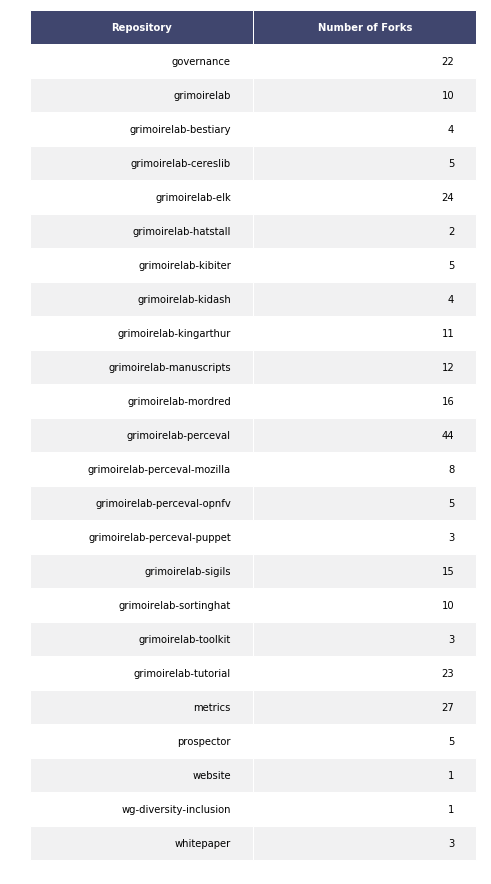

In [47]:
fig=render_mpl_table(fork_Dataframe, header_columns=0, col_width=4.0)
fig.savefig('number of forks')